# fitting high-order epistasis in a nonlinear genotype-phenotype map

This notebook defines a protocol for estimating high-order genotypic epistasis in nonlinear genotype-phenotype map.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy

from epistasis.simulate import NonlinearSimulation, AdditiveSimulation
from epistasis.models import NonlinearEpistasisModel, LinearEpistasisModel

## estimate nonlinearity with power transform

In principle, epistasis is defined as deviation of expected additivety.

In [5]:
def power_transform(x, lmbda, A, B):
    """Power transformation function."""
    gmean = scipy.stats.mstats.gmean(x + A)
    if lmbda == 0:
        return gmean*numpy.log(x+A)
    else:
        first = (x+A)**lmbda
        out = (first - 1.0)/(lmbda * gmean**(lmbda-1)) + B
        return out

In [6]:
model = NonlinearEpistasisModel.from_json("data/nonlinear-data.json", order=1, 
    function=power_transform, 
    model_type="global",
    fix_linear=True
)

R-squared of fit: 0.953742328428
A: -0.603223862413
lmbda: -0.401520854787
B: 1.10763994335


/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/scipy/stats/stats.py:313: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)
/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in power


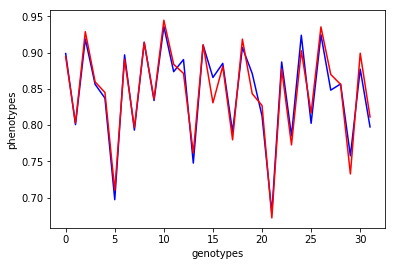

In [7]:
model.fit_widget(lmbda=(-5,5,.1), A=(-5,5,.1), B=(-5,5,.1))

In [8]:
padd = model.statistics.linear()
pobs = model.phenotypes
pmodeladd = np.linspace(min(padd), max(padd),1000)
pmodelobs = model.function(pmodeladd, *model.parameters.get_params())

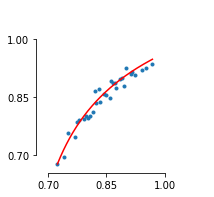

In [12]:
fig, ax = plt.subplots(figsize=(3,3))

ax.plot(padd, pobs, '.')
ax.plot(pmodeladd, pmodelobs, 'r-')
ax.axis('equal')
ax.axis([0.67, 1.1, 0.63, 1.1])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_bounds(.7, 1)
ax.spines['left'].set_bounds(.7, 1)
ax.set_xticks(np.linspace(0.7, 1, 3))
ax.set_yticks(np.linspace(0.7, 1, 3))
fig.savefig("../docs/_img/nonlinear-phenotypes-model.svg", format="svg")

## transform phenotypes to the estimated linear scale
